# LIMECHO 操作题（共100’）

以下是一段用于数据处理的程序，请阅读程序并根据指示完成任务I - III。

In [8]:
import numpy as np
import scipy.optimize as opt

# 获取信号的相位
'''
信号 y
起始时间t0
采样时间dwell_time（默认值）
'''

# 得到相位校正参数phi
def get_phase(y, t0=0, dwell_time=1):
    PAD_TO = 10000
    if len(y) < PAD_TO:
        # 对信号进行零填充
        # 用于沿指定轴连接两个或多个相同形状得数组 dtype:str 或 dtype
        y_pad = np.concatenate((y, np.zeros(PAD_TO - len(y), dtype=np.complex_)))
    else:
        y_pad = y
    # 对y进行傅里叶变换得到频域fft_y
    fft_y = np.fft.fftshift(np.fft.fft(y_pad))

    # 如果t0不为0,则将fft_y乘以一个相位矫正因子，以对应t0的时移
    if t0 != 0:
        '''
                np.fft.fftfreq(len(fft_y), dwell_time):
                返回傅里叶变换采样频率：
                窗口长度n :10000
                采样间隔（采样率的倒数）：默认为1
                返回：包含样本频率的长度为n = 10000的数组
        '''
        fft_f = np.fft.fftshift(np.fft.fftfreq(len(fft_y), dwell_time))
        fft_y *= np.exp(1j * 2 * np.pi * -t0 * fft_f)

    # 计算最小化目标函数
    def minf(phi):
        '''

        目标函数的定义 是 根据 最小化傅里叶变换结果fft_y_phased的 实部平方和 和 虚部平方和的差值
        :param phi:
        :return:
        '''

        fft_y_phased = fft_y * np.exp(1j * phi[0])
        fft_y_phased_R2 = fft_y_phased.real ** 2
        fft_y_phased_I2 = fft_y_phased.imag ** 2
        thresh = max(fft_y_phased_R2.max(), fft_y_phased_I2.max()) / 100
        return np.clip(fft_y_phased_I2, thresh, None).sum() - np.clip(fft_y_phased_R2, thresh, None).sum()

    phi_guess = -np.angle(y[np.argmax(np.abs(y))])
    res = opt.minimize(minf, np.array([phi_guess]), method='nelder-mead')

    phi = res['x'][0]
    fft_y_phased = fft_y * np.exp(1j * phi)

    # 如果总和为负，则将phi增加pi，以保证校正后波形为正
    if fft_y_phased.sum() < 0:
        phi += np.pi
    return phi

# 自动相位校正
def auto_phase(y, t0=0, dwell_time=1, fast=False):
    # 是否采用快速方法：
    # # 只根据y的幅度最大值来来估计相位矫正参数
    if fast:
        phi = -np.angle(y[np.argmax(np.abs(y))])
    # 精确计算相位矫正参数
    else:
        phi = get_phase(y, t0, dwell_time)

    # 将输入的y进行相位矫正，并返回矫正后的结果
    result = y * np.exp(1j * phi)
    return result

---
### Part I 阅读以上程序，绘制流程图（30'）

* 绘图工具不限，可手绘后拍照提交
* 输入输出用平行四边形表示，判断用菱形，运算用矩形
* 流程图尽量详细，用数学符号或 NumPy 方法名称写出运算表达式
* 可以使用搜索引擎查找 NumPy 方法对应的数学运算符

在此处插入图片（图片格式不限）：

![流程图](./image.png)
---

### Part II 根据提示编写代码（60'）

* 用于绘图的Python库函数不限
* 保留运行结果

In [0]:
# TODO: 1. 读取 "FID.npy" 文件，查看其数据结构

In [31]:
import numpy as np
y = np.load("./FID.npy")
print(type(y), '\n--------------\n', y)

<class 'numpy.ndarray'> 
--------------
 [ 5.23106245e-06-9.99631178e-06j  3.09393401e-06-1.04162115e-05j
  1.03500690e-06-1.02257815e-05j -9.38683903e-07-9.71051204e-06j
 -2.87272523e-06-8.91371155e-06j -4.59736928e-06-7.75337245e-06j
 -5.94874709e-06-6.37592060e-06j -7.02434064e-06-4.94813371e-06j
 -7.90689465e-06-3.39920316e-06j -8.38225136e-06-1.71317891e-06j
 -8.24067279e-06-6.38746218e-08j -7.65912390e-06+1.43687839e-06j
 -6.95576030e-06+2.78831189e-06j -6.18457610e-06+3.99913987e-06j
 -5.23479513e-06+5.01839684e-06j -4.03297844e-06+5.73157206e-06j
 -2.63217445e-06+6.11820610e-06j -1.28908593e-06+6.29789482e-06j
 -1.49088288e-07+6.31817682e-06j  9.73241641e-07+6.08724797e-06j
  2.14449376e-06+5.53326523e-06j  3.14248341e-06+4.68617122e-06j
  3.85384278e-06+3.67188613e-06j  4.32958267e-06+2.64707215e-06j
  4.60952715e-06+1.66290427e-06j  4.74582523e-06+6.63886841e-07j
  4.74608949e-06-3.25266121e-07j  4.48464797e-06-1.13418579e-06j
  3.87843884e-06-1.63743144e-06j  3.11397818e-06-

In [ ]:
# TODO: 2. 调用主程序（auto_phase）对数据进行处理（参数可使用默认值）

In [32]:
result = auto_phase(y, t0=0, dwell_time=1, fast=False)

In [ ]:
# TODO: 3. 绘制原始信号和处理结果的图像（原始信号的实部和虚部画在一个图里， 处理结果另外画一个图）

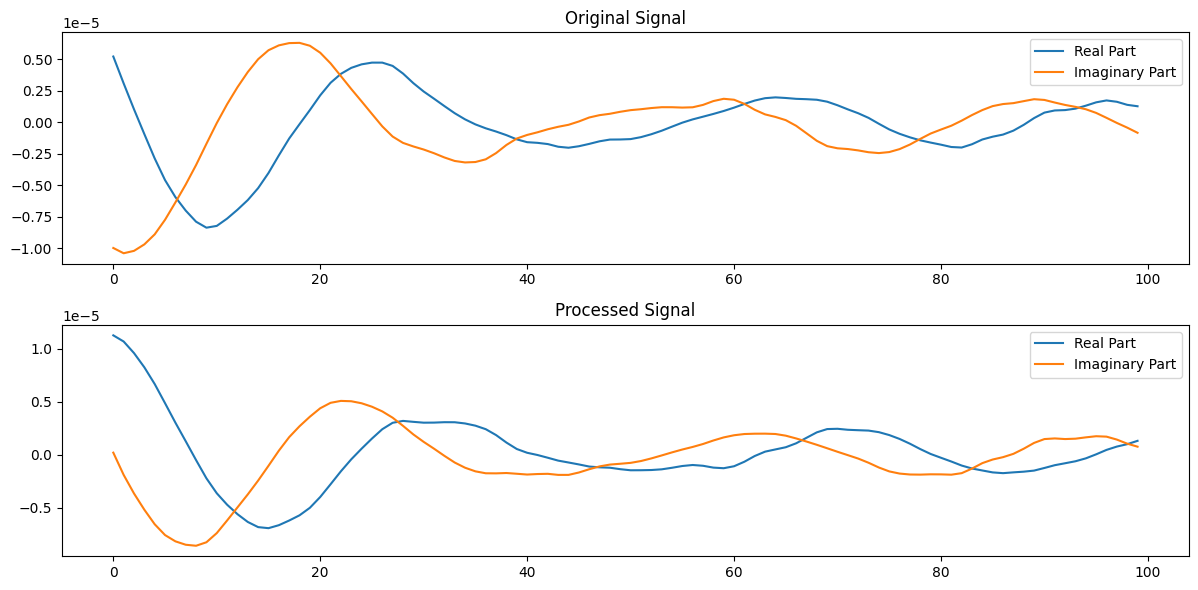

In [36]:
import matplotlib.pyplot as plt
# 绘制原始信号的实部和虚部
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(y.real, label='Real Part')
plt.plot(y.imag, label='Imaginary Part')
plt.title('Original Signal')
plt.legend()

# 绘制处理结果的实部和虚部
plt.subplot(2, 1, 2)
plt.plot(result.real, label='Real Part')
plt.plot(result.imag, label='Imaginary Part')
plt.title('Processed Signal')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# TODO: 4. 将实部信号保存为 "real.csv" 文件

In [35]:
result_real = result.real
result_imag = result.imag
path = './real.csv'
np.savetxt(path, result_real)

---
### Part III 格式与提交(10')

* 将所有文件放到一个目录下
* 文件包括： `image.png`、`limecho_test.ipynb`、`FID.npy` 和 `real.csv`
* 将主目录压缩为zip文件，压缩包以姓名命名